# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness, however, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed, however in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = "2092f20a9cc5d2c19008fc62765c923e"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severodvinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=severodvinsk
Processing Record 2 of Set 1 | nueva loja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=nueva%20loja
Processing Record 3 of Set 1 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=okhotsk
Processing Record 4 of Set 1 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=lavrentiya
Processing Record 5 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=rikitea
Processing Record 6 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=hermanus
Processing Rec

City not found. Skipping...
Processing Record 2 of Set 2 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=yellowknife
Processing Record 3 of Set 2 | wencheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=wencheng
Processing Record 4 of Set 2 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=bubaque
Processing Record 5 of Set 2 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=tasiilaq
Processing Record 6 of Set 2 | sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=sorong
Processing Record 7 of Set 2 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=norman%20wells
Processing Record 8 of Set 2 | bethel
http://api.o

Processing Record 5 of Set 3 | whitehaven
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=whitehaven
Processing Record 6 of Set 3 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=mar%20del%20plata
Processing Record 7 of Set 3 | sarkand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=sarkand
Processing Record 8 of Set 3 | alto paraguai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=alto%20paraguai
Processing Record 9 of Set 3 | porbandar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=porbandar
Processing Record 10 of Set 3 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=kununurra
Processing Record 11 of Set 3 | padang
http://api.openw

Processing Record 8 of Set 4 | ihosy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=ihosy
Processing Record 9 of Set 4 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=mys%20shmidta
City not found. Skipping...
Processing Record 10 of Set 4 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=saleaula
City not found. Skipping...
Processing Record 11 of Set 4 | san policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=san%20policarpo
Processing Record 12 of Set 4 | boguchany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=boguchany
Processing Record 13 of Set 4 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=ostrovnoy
Processing

City not found. Skipping...
Processing Record 11 of Set 5 | ust-kuyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=ust-kuyga
Processing Record 12 of Set 5 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=namibe
Processing Record 13 of Set 5 | bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=bilibino
Processing Record 14 of Set 5 | iguai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=iguai
Processing Record 15 of Set 5 | takoradi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=takoradi
Processing Record 16 of Set 5 | ngukurr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=ngukurr
City not found. Skipping...
Processing Record 17 of Set 5 | umzi

Processing Record 14 of Set 6 | shido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=shido
Processing Record 15 of Set 6 | santa cruz cabralia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=santa%20cruz%20cabralia
Processing Record 16 of Set 6 | shaartuz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=shaartuz
City not found. Skipping...
Processing Record 17 of Set 6 | cockburn town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=cockburn%20town
Processing Record 18 of Set 6 | rosita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=rosita
Processing Record 19 of Set 6 | sumenep
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=sumenep
Processing Record 20 of Set 

Processing Record 16 of Set 7 | suntar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=suntar
Processing Record 17 of Set 7 | kysyl-syr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=kysyl-syr
Processing Record 18 of Set 7 | launceston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=launceston
Processing Record 19 of Set 7 | vikhorevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=vikhorevka
Processing Record 20 of Set 7 | nalut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=nalut
Processing Record 21 of Set 7 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=maniitsoq
Processing Record 22 of Set 7 | lata
http://api.openweathermap.org/data/2.5/weat

Processing Record 19 of Set 8 | maarianhamina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=maarianhamina
City not found. Skipping...
Processing Record 20 of Set 8 | pemangkat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=pemangkat
City not found. Skipping...
Processing Record 21 of Set 8 | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=ixtapa
Processing Record 22 of Set 8 | anshun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=anshun
Processing Record 23 of Set 8 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=severo-yeniseyskiy
Processing Record 24 of Set 8 | vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=vao
Processing R

Processing Record 23 of Set 9 | belyy yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=belyy%20yar
Processing Record 24 of Set 9 | miles city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=miles%20city
Processing Record 25 of Set 9 | lebowakgomo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=lebowakgomo
Processing Record 26 of Set 9 | moscow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=moscow
Processing Record 27 of Set 9 | nara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=nara
Processing Record 28 of Set 9 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=tsihombe
City not found. Skipping...
Processing Record 29 of Set 9 | tucuman
http://api

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=altay
Processing Record 27 of Set 10 | williams lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=williams%20lake
Processing Record 28 of Set 10 | kommunar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=kommunar
Processing Record 29 of Set 10 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=faya
Processing Record 30 of Set 10 | kallithiron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=kallithiron
Processing Record 31 of Set 10 | mountmellick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=mountmellick
Processing Record 32 of Set 10 | gazanjyk
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 29 of Set 11 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=broome
Processing Record 30 of Set 11 | ust-barguzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=ust-barguzin
Processing Record 31 of Set 11 | ialibu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=ialibu
Processing Record 32 of Set 11 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=hamilton
Processing Record 33 of Set 11 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=hambantota
Processing Record 34 of Set 11 | kaspiysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=kaspiysk
Processing Record 35 of Set 11 | chenghai
http://api.openweathermap.org/

Processing Record 33 of Set 12 | caetes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=caetes
Processing Record 34 of Set 12 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=kamenskoye
City not found. Skipping...
Processing Record 35 of Set 12 | huadian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=huadian
Processing Record 36 of Set 12 | honiara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=honiara
Processing Record 37 of Set 12 | mecca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=mecca
Processing Record 38 of Set 12 | concord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2092f20a9cc5d2c19008fc62765c923e&q=concord
Processing Record 39 of Set 12 | ust-maya
http://api.openwea

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severodvinsk,0,RU,1524097800,80,64.56,39.82,30.20,4.47
1,nueva loja,92,EC,1524099488,100,0.08,-76.88,73.97,1.34
2,okhotsk,20,RU,1524099488,98,59.36,143.24,26.81,1.90
3,lavrentiya,8,RU,1524099488,100,65.58,-170.99,31.27,23.38
4,rikitea,80,PF,1524099488,99,-23.12,-134.97,80.50,14.43


## Latitude vs Temperature Plot

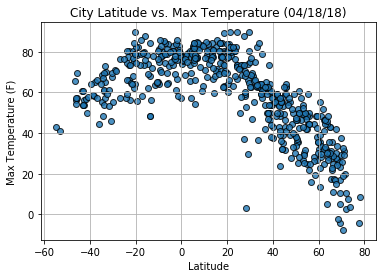

In [6]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

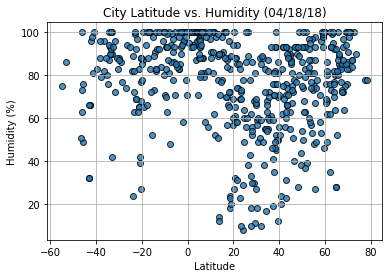

In [7]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

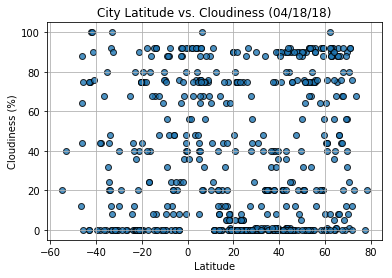

In [8]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

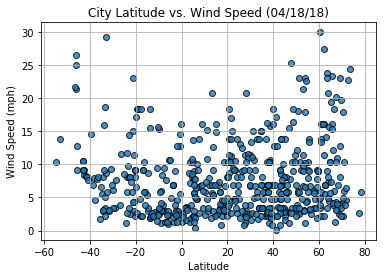

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()